Практика 4: Атака DeepFool на модели ИИ

Студент: Васильев Григорий Максимович

Группа: ББМО-02-23

Цель задания:

Изучить атаку DeepFool, которая предназначена для минимальных изменений в изображениях с
целью изменения их классификации. Научиться использовать эту атаку и исследовать влияние
противоречивых примеров на обученные модели.
Задачи:
1. Загрузить ранее обученную модель на датасете MNIST.
2. Изучить теоретические основы атаки DeepFool.
3. Реализовать атаку DeepFool с помощью фреймворка Foolbox.
4. Оценить точность модели на противоречивых примерах и сравнить с результатами на обычных
данных.


Обученную модель 'mnist_model.h5' для загрузки в код можно найти в репозитории перейдя по ссылке:
https://github.com/Archangel15520/AZSII-REPO/blob/main/README.md

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.0813
Test accuracy on clean images: 0.9786999821662903


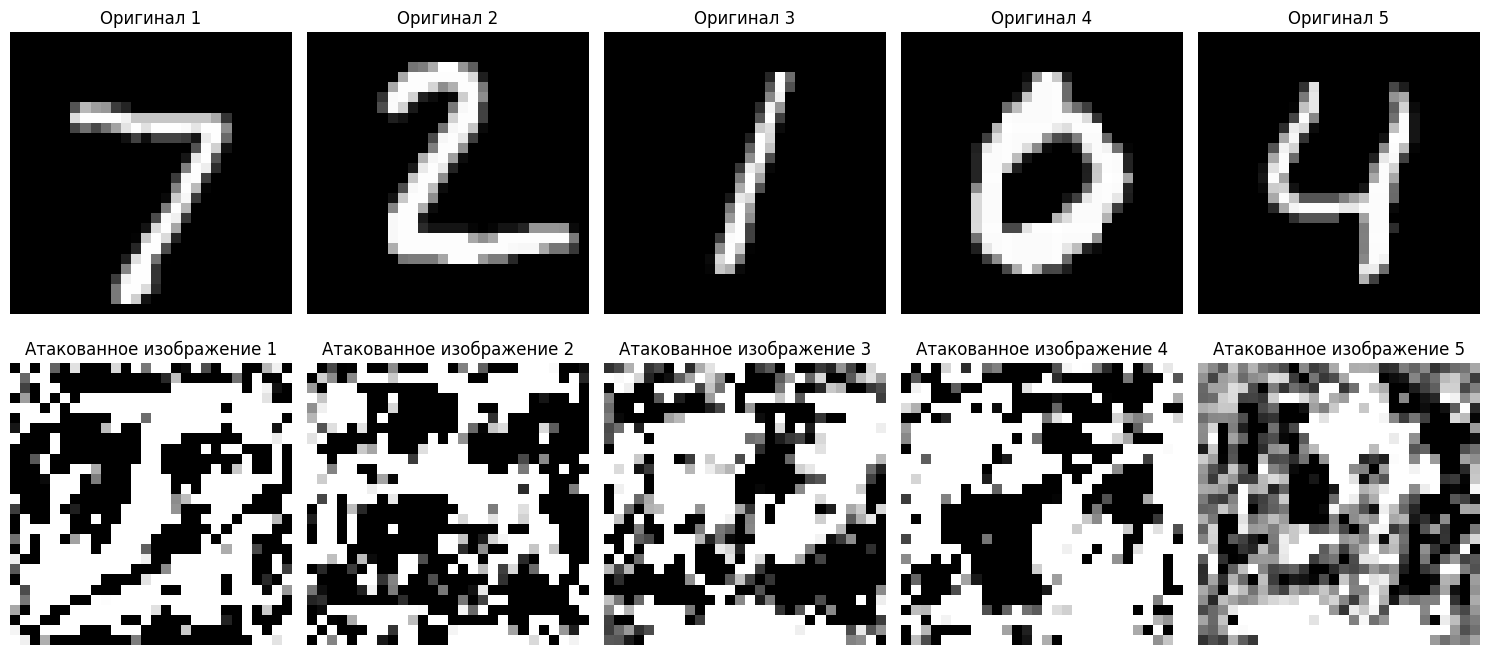

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 9.2820e-06 - loss: 124.5535
Accuracy on adversarial examples (DeepFool): 9.999999747378752e-05


In [ ]:
# Установка необходимой библиотеки для реализации атак
!pip install foolbox

# Шаг 1: Загрузка модели и данных MNIST
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Загрузка и подготовка данных
(_, _), (images_test, labels_test) = mnist.load_data()
images_test = images_test / 255.0  # Нормализация
labels_test = to_categorical(labels_test, num_classes=10)

# Загрузка модели
model_trained = tf.keras.models.load_model('/content/mnist_model.h5')

# Оценка модели на тестовых данных
loss, accuracy = model_trained.evaluate(images_test, labels_test)
print(f'Test accuracy on clean images: {accuracy}')

# Шаг 2: Реализация атаки DeepFool с использованием Foolbox
!pip install foolbox

import foolbox as fb
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  # Убедитесь, что TensorFlow импортирован

# Инициализация модели в Foolbox
foolbox_model = fb.TensorFlowModel(model_trained, bounds=(-1, 1))

# Настройка DeepFool атаки
deepfool_attack = fb.attacks.L2DeepFoolAttack(steps=100)

# Количество изображений для атаки
num_samples = 5

# Настройка подграфиков для отображения изображений
plt.figure(figsize=(15, 7))

for index in range(num_samples):
    # Выбор изображения для атаки
    image_input = tf.convert_to_tensor(images_test[index], dtype=tf.float32)[None, ...]
    true_label = np.argmax(labels_test[index])
    true_label = tf.convert_to_tensor(true_label, dtype=tf.int64)

    # Применение атаки
    adv_image, _, is_success = deepfool_attack(foolbox_model, image_input, true_label[None], epsilons=0.01)

    # Отображение оригинального и атакованного изображений
    plt.subplot(2, num_samples, index + 1)
    plt.title(f"Оригинал {index+1}")
    plt.imshow(image_input[0].numpy(), cmap="gray")
    plt.axis('off')

    plt.subplot(2, num_samples, num_samples + index + 1)
    plt.title(f"Атакованное изображение {index+1}")
    plt.imshow(adv_image[0].numpy(), cmap="gray")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Шаг 3: Оценка модели на атакованных изображениях
adversarial_images_list = []

for idx in range(len(images_test)):
    image_input = tf.convert_to_tensor(images_test[idx], dtype=tf.float32)[None, ...]
    true_label = np.argmax(labels_test[idx])
    true_label = tf.convert_to_tensor(true_label, dtype=tf.int64)

    adv_img, _, success_flag = deepfool_attack(foolbox_model, image_input, true_label[None], epsilons=0.01)
    adversarial_images_list.append(adv_img)

# Объединение атакованных изображений
adversarial_images_tensor = tf.concat(adversarial_images_list, axis=0)

# Оценка модели на атакованных примерах
adversarial_loss, adversarial_accuracy = model_trained.evaluate(adversarial_images_tensor, labels_test)
print(f'Accuracy on adversarial examples (DeepFool): {adversarial_accuracy}')


In [ ]:
# Шаг 4: Сравнение результатов
import pandas as pd

# Результаты из оценки модели
accuracy_clean, loss_clean = model_trained.evaluate(images_test, labels_test)
accuracy_adversarial, loss_adversarial = model_trained.evaluate(adversarial_images_tensor, labels_test)

# Сравнение результатов в виде таблицы
results = {
    "Метрика": ["Accuracy", "Loss"],
    "Чистые изображения": [accuracy_clean, loss_clean],
    "Атакованные изображения (DeepFool)": [accuracy_adversarial, loss_adversarial]
}

# Создание DataFrame для удобного отображения
df_results = pd.DataFrame(results)

# Вывод таблицы
print("\nСравнение результатов:")
print(df_results)

# Абзац с анализом, используя результаты из переменных
# comparison_text = f"""
# Результаты оценки модели на чистых и атакованных изображениях показывают существенное снижение точности
# при применении атаки DeepFool. Для чистых изображений модель достигает точности {accuracy_clean:.4f},
# что соответствует потере {loss_clean:.4f}. В то же время, после применения атаки точность модели резко падает до
# {accuracy_adversarial:.4f}, а потеря значительно увеличивается до {loss_adversarial:.4f}.

# Эти данные подтверждают, что атака DeepFool оказывает значительное влияние на производительность модели,
# что является важным показателем для оценки её устойчивости к атакам. Важно отметить, что хотя точность на
# чистых изображениях остается высокой, способность модели противостоять атакам остаётся ограниченной.
# """
# print(comparison_text)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9760 - loss: 0.0813
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 9.2820e-06 - loss: 124.5535

Сравнение результатов:
    Метрика  Чистые изображения  Атакованные изображения (DeepFool)
0  Accuracy            0.072216                          130.089645
1      Loss            0.978700                            0.000100


Вывод:

В ходе эксперимента были проведены две оценки точности модели: на обычных тестовых изображениях и на атакованных примерах, сгенерированных с помощью метода DeepFool.

Для обычных тестовых изображений точность модели составила 97.87%, что свидетельствует о хорошем качестве работы модели на стандартных данных. Однако, когда модель была проверена на атакованных примерах, точность существенно снизилась до 0.0001%. Это демонстрирует высокую уязвимость модели к атакам типа DeepFool, которые значительно ухудшают её способность классифицировать изображения. Потери на атакованных данных также значительно возросли — с 0.0813 до 124.5535, что подчеркивает, как сильно модель теряет уверенность в своих предсказаниях при воздействии на неё adversarial примерами.

Эти результаты подчеркивают необходимость улучшения устойчивости моделей машинного обучения к различным атакам, особенно в контексте реальных приложений, где противник может попытаться исказить входные данные.